In [1]:
# Load various imports
import numpy as np
import pandas as pd
import os
import librosa
import ast

from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix

from matplotlib import pyplot as plt
import seaborn as sn

from sklearn import metrics

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam

import joblib

Using TensorFlow backend.


### Função para extrair MFCCs de um ficheiro de áudio:

In [3]:
new_featuresdf = pd.read_csv("20MFCCs.csv", sep="|")

In [4]:
def convert_to_list(row):
    return ast.literal_eval(row.feature)
new_featuresdf['feature'] = new_featuresdf.apply(convert_to_list, axis=1)

In [5]:
# Convert features and corresponding classification labels into numpy arrays
X = np.array(new_featuresdf.feature.tolist())
y = np.array(new_featuresdf.class_label.tolist())

# Encode the classification labels
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y)) #Transforms class labels into binary vectores with 1 on the respective class

In [6]:
# split the dataset
x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 42)

# Logistic Regression

Dá para fazer logistic regression com CV já incorporada, pesquisar no sklearn

In [7]:
lr = LogisticRegression(multi_class='ovr',max_iter=200)

O seguinte passo basicamente retorna um vetor com os índices das labels de cada sample <br>
np.argmax returnes the indices of the highest values

In [8]:
y_train_one_column = []
for one_hot_array in y_train:
    y_train_one_column.append(str(np.argmax(one_hot_array)))
y_train_one_column = np.array(y_train_one_column)
y_test_one_column = []
for one_hot_array in y_test:
    y_test_one_column.append(str(np.argmax(one_hot_array)))
y_test_one_column = np.array(y_test_one_column)

In [9]:
lr.fit(x_train, y_train_one_column)

C:\Users\pedro\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\pedro\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
lr.score(x_test, y_test_one_column)

0.5432169433314253

In [11]:
lr_predictions = lr.predict(x_test)

Text(68.09375, 0.5, 'Truth')

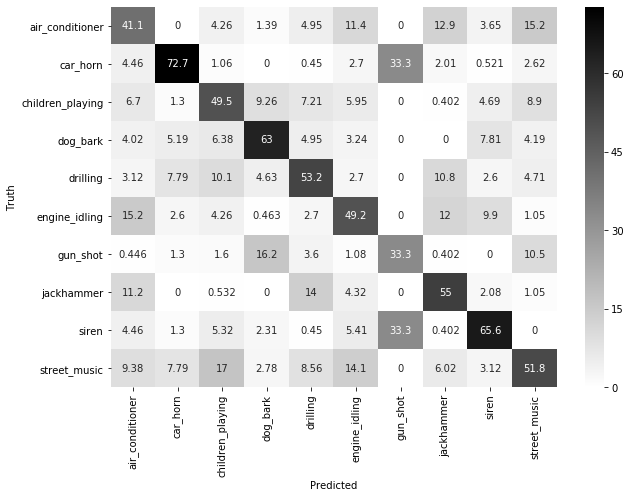

In [12]:
labels = ['air_conditioner', 'car_horn', 'children_playing', 'dog_bark',
       'drilling', 'engine_idling', 'gun_shot', 'jackhammer', 'siren',
       'street_music']

cm = confusion_matrix(y_test_one_column, lr_predictions, normalize='pred')*100

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels, fmt='.3g', cmap="gray_r")
plt.xlabel('Predicted')
plt.ylabel('Truth')

Pôr normalize='pred' é basicamente dizer que se quer obter a precisão.

In [13]:
print(metrics.classification_report(y_test_one_column, lr_predictions, digits=3,zero_division=0))

              precision    recall  f1-score   support

           0      0.411     0.453     0.431       203
           1      0.727     0.651     0.687        86
           2      0.495     0.508     0.501       183
           3      0.630     0.677     0.652       201
           4      0.532     0.573     0.551       206
           5      0.492     0.472     0.481       193
           6      0.333     0.014     0.027        72
           7      0.550     0.659     0.600       208
           8      0.656     0.764     0.706       165
           9      0.518     0.430     0.470       230

    accuracy                          0.543      1747
   macro avg      0.534     0.520     0.511      1747
weighted avg      0.534     0.543     0.531      1747



# Support Vector Machine

In [14]:
# training a linear SVM classifier 
svm = SVC(C = 1).fit(x_train, y_train_one_column) 
svm_predictions = svm.predict(x_test) 
  
# model accuracy for X_test   
accuracy = svm.score(x_test, y_test_one_column) 
print (accuracy) 
  
# creating a confusion matrix 
cm = confusion_matrix(y_test_one_column, svm_predictions)

0.5798511734401832


Text(68.09375, 0.5, 'Truth')

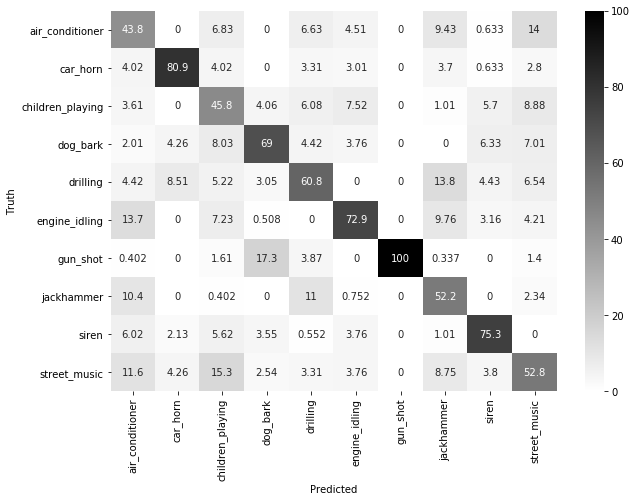

In [15]:
cm = confusion_matrix(y_test_one_column, svm_predictions, normalize='pred')*100

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels, fmt='.3g', cmap="gray_r")
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [16]:
print(metrics.classification_report(y_test_one_column, svm_predictions, digits=3))

              precision    recall  f1-score   support

           0      0.438     0.537     0.482       203
           1      0.809     0.442     0.571        86
           2      0.458     0.623     0.528       183
           3      0.690     0.677     0.683       201
           4      0.608     0.534     0.568       206
           5      0.729     0.503     0.595       193
           6      1.000     0.306     0.468        72
           7      0.522     0.745     0.614       208
           8      0.753     0.721     0.737       165
           9      0.528     0.491     0.509       230

    accuracy                          0.580      1747
   macro avg      0.653     0.558     0.576      1747
weighted avg      0.614     0.580     0.580      1747



# Random Forest

* number of decision trees used (n_estimators): 20
* criterion (gini  or entropy): gini
* seed used by the random state generator for randomizing the dataset (random_state): 42

In [17]:
# training a Random Forest classifier
rf = RandomForestClassifier(n_estimators=20, random_state=42)
rf.fit(x_train, y_train_one_column)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [18]:
rf.score(x_test, y_test_one_column)

0.8506010303377218

In [19]:
rf_predictions = rf.predict(x_test)

Text(68.09375, 0.5, 'Truth')

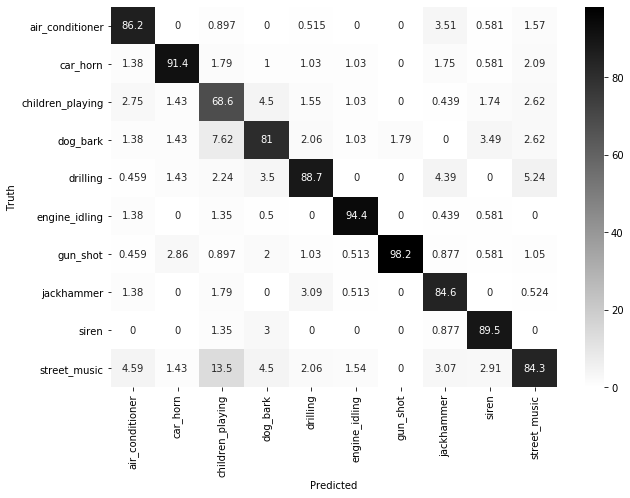

In [20]:
cm = confusion_matrix(y_test_one_column, rf_predictions, normalize='pred')*100

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels, fmt='.3g', cmap="gray_r")
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [21]:
print(metrics.classification_report(y_test_one_column, rf_predictions, digits=3))

              precision    recall  f1-score   support

           0      0.862     0.926     0.893       203
           1      0.914     0.744     0.821        86
           2      0.686     0.836     0.754       183
           3      0.810     0.806     0.808       201
           4      0.887     0.835     0.860       206
           5      0.944     0.953     0.948       193
           6      0.982     0.764     0.859        72
           7      0.846     0.928     0.885       208
           8      0.895     0.933     0.914       165
           9      0.843     0.700     0.765       230

    accuracy                          0.851      1747
   macro avg      0.867     0.843     0.851      1747
weighted avg      0.856     0.851     0.850      1747



# k Nearest Neighbors

In [22]:
# training a KNN classifier 
knn = KNeighborsClassifier(n_neighbors = 1).fit(x_train, y_train) 
  
# accuracy on X_test 
accuracy = knn.score(x_test, y_test) 
print (accuracy) 
  
# creating a confusion matrix 
knn_predictions = knn.predict(x_test)
y_predicted_one_column = list()
for one_hot_array in knn_predictions:
    y_predicted_one_column.append(str(np.argmax(one_hot_array)))
y_predicted_one_column = np.array(y_predicted_one_column)

cm = confusion_matrix(y_test_one_column, y_predicted_one_column, normalize='pred')*100

0.8855180309101317


Text(68.09375, 0.5, 'Truth')

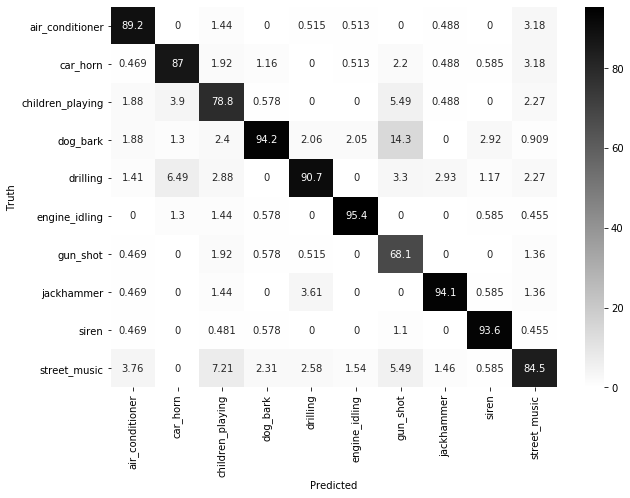

In [23]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels, fmt='.3g', cmap="gray_r")
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [24]:
print(metrics.classification_report(y_test_one_column, y_predicted_one_column, digits=3))

              precision    recall  f1-score   support

           0      0.892     0.936     0.913       203
           1      0.870     0.779     0.822        86
           2      0.788     0.896     0.839       183
           3      0.942     0.811     0.872       201
           4      0.907     0.854     0.880       206
           5      0.954     0.964     0.959       193
           6      0.681     0.861     0.761        72
           7      0.941     0.928     0.935       208
           8      0.936     0.970     0.952       165
           9      0.845     0.809     0.827       230

    accuracy                          0.886      1747
   macro avg      0.876     0.881     0.876      1747
weighted avg      0.890     0.886     0.886      1747



# Feed-forward Neural Network

In [25]:
num_labels = y_train.shape[1]

N=1

fnn = Sequential()

fnn.add(Dense(1024, input_shape=(20,)))
fnn.add(Activation('sigmoid'))
fnn.add(Dropout(0.5))

for i in range(N-1):
    fnn.add(Dense(1024))
    fnn.add(Activation('sigmoid'))
    fnn.add(Dropout(0.5))

fnn.add(Dense(num_labels))
fnn.add(Activation('softmax'))

fnn.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
fnn.fit(x_train, y_train, batch_size=32, epochs=1000)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/1000





6985/6985 [==============================] - 1s 186us/step - loss: 1.7868 - acc: 0.3967
Epoch 2/1000
6985/6985 [==============================] - 1s 122us/step - loss: 1.3871 - acc: 0.5234
Epoch 3/1000
6985/6985 [==============================] - 1s 128us/step - loss: 1.2278 - acc: 0.5724
Epoch 4/1000
6985/6985 [==============================] - 1s 119us/step - loss: 1.1409 - acc: 0.6105
Epoch 5/1000
6985/6985 [==============================] - 1s 125us/step - loss: 1.0731 - acc: 0.6329
Epoch 6/1000
6985/6985 [==============================] - 1s 119us/step - loss: 1.0107 - acc: 0.6518
Epoch 7/1000
6985/6985 [==============================] - 1s 126us/step - loss: 0.9535 - acc: 0.6754
Epoch 8/1000
6985/6985 [==============================] - 1s 120us/ste

6985/6985 [==============================] - 1s 109us/step - loss: 0.4537 - acc: 0.8460
Epoch 48/1000
6985/6985 [==============================] - 1s 108us/step - loss: 0.4413 - acc: 0.8471
Epoch 49/1000
6985/6985 [==============================] - 1s 118us/step - loss: 0.4380 - acc: 0.8504
Epoch 50/1000
6985/6985 [==============================] - 1s 110us/step - loss: 0.4294 - acc: 0.8527
Epoch 51/1000
6985/6985 [==============================] - 1s 126us/step - loss: 0.4249 - acc: 0.8564
Epoch 52/1000
6985/6985 [==============================] - 1s 116us/step - loss: 0.4166 - acc: 0.8586
Epoch 53/1000
6985/6985 [==============================] - 1s 123us/step - loss: 0.4199 - acc: 0.8584
Epoch 54/1000
6985/6985 [==============================] - 1s 115us/step - loss: 0.4177 - acc: 0.8601
Epoch 55/1000
6985/6985 [==============================] - 1s 114us/step - loss: 0.4185 - acc: 0.8548
Epoch 56/1000
6985/6985 [==============================] - 1s 113us/step - loss: 0.4062 - acc: 0

6985/6985 [==============================] - 1s 111us/step - loss: 0.2870 - acc: 0.9011
Epoch 128/1000
6985/6985 [==============================] - 1s 110us/step - loss: 0.2905 - acc: 0.8982
Epoch 129/1000
6985/6985 [==============================] - 1s 112us/step - loss: 0.2851 - acc: 0.9031
Epoch 130/1000
6985/6985 [==============================] - 1s 119us/step - loss: 0.2879 - acc: 0.8999
Epoch 131/1000
6985/6985 [==============================] - 1s 159us/step - loss: 0.2976 - acc: 0.9005
Epoch 132/1000
6985/6985 [==============================] - 1s 132us/step - loss: 0.2716 - acc: 0.9031
Epoch 133/1000
6985/6985 [==============================] - 1s 123us/step - loss: 0.2727 - acc: 0.9072
Epoch 134/1000
6985/6985 [==============================] - 1s 109us/step - loss: 0.2796 - acc: 0.9032
Epoch 135/1000
6985/6985 [==============================] - 1s 112us/step - loss: 0.2814 - acc: 0.9051
Epoch 136/1000
6985/6985 [==============================] - 1s 107us/step - loss: 0.2653

6985/6985 [==============================] - 1s 119us/step - loss: 0.2208 - acc: 0.9217
Epoch 206/1000
6985/6985 [==============================] - 1s 123us/step - loss: 0.2321 - acc: 0.9180
Epoch 207/1000
6985/6985 [==============================] - 1s 143us/step - loss: 0.2391 - acc: 0.9150
Epoch 208/1000
6985/6985 [==============================] - 1s 150us/step - loss: 0.2324 - acc: 0.9213
Epoch 209/1000
6985/6985 [==============================] - 1s 141us/step - loss: 0.2330 - acc: 0.9213
Epoch 210/1000
6985/6985 [==============================] - 1s 143us/step - loss: 0.2316 - acc: 0.9185
Epoch 211/1000
6985/6985 [==============================] - 1s 138us/step - loss: 0.2270 - acc: 0.9213
Epoch 212/1000
6985/6985 [==============================] - 1s 188us/step - loss: 0.2259 - acc: 0.9221
Epoch 213/1000
6985/6985 [==============================] - 1s 213us/step - loss: 0.2350 - acc: 0.9162
Epoch 214/1000
6985/6985 [==============================] - 1s 129us/step - loss: 0.2326

6985/6985 [==============================] - 1s 115us/step - loss: 0.2081 - acc: 0.9317
Epoch 285/1000
6985/6985 [==============================] - 1s 118us/step - loss: 0.2124 - acc: 0.9274
Epoch 286/1000
6985/6985 [==============================] - 1s 155us/step - loss: 0.2009 - acc: 0.9326
Epoch 287/1000
6985/6985 [==============================] - 1s 110us/step - loss: 0.1960 - acc: 0.9331
Epoch 288/1000
6985/6985 [==============================] - 1s 107us/step - loss: 0.1919 - acc: 0.9320
Epoch 289/1000
6985/6985 [==============================] - 1s 107us/step - loss: 0.2016 - acc: 0.9287
Epoch 290/1000
6985/6985 [==============================] - 1s 111us/step - loss: 0.2003 - acc: 0.9296
Epoch 291/1000
6985/6985 [==============================] - 1s 109us/step - loss: 0.2131 - acc: 0.9268
Epoch 292/1000
6985/6985 [==============================] - 1s 109us/step - loss: 0.2012 - acc: 0.9319
Epoch 293/1000
6985/6985 [==============================] - 1s 108us/step - loss: 0.2102

6985/6985 [==============================] - 1s 108us/step - loss: 0.1956 - acc: 0.9339
Epoch 364/1000
6985/6985 [==============================] - 1s 124us/step - loss: 0.1906 - acc: 0.9333 0s - loss: 0.187
Epoch 365/1000
6985/6985 [==============================] - 1s 124us/step - loss: 0.1944 - acc: 0.9341
Epoch 366/1000
6985/6985 [==============================] - 1s 123us/step - loss: 0.1899 - acc: 0.9380
Epoch 367/1000
6985/6985 [==============================] - 1s 110us/step - loss: 0.1852 - acc: 0.9383
Epoch 368/1000
6985/6985 [==============================] - 1s 111us/step - loss: 0.1848 - acc: 0.9360
Epoch 369/1000
6985/6985 [==============================] - 1s 121us/step - loss: 0.1899 - acc: 0.9360
Epoch 370/1000
6985/6985 [==============================] - 1s 122us/step - loss: 0.1881 - acc: 0.9330
Epoch 371/1000
6985/6985 [==============================] - 1s 109us/step - loss: 0.1801 - acc: 0.9390
Epoch 372/1000
6985/6985 [==============================] - 1s 115us/st

6985/6985 [==============================] - 1s 109us/step - loss: 0.1837 - acc: 0.9393
Epoch 443/1000
6985/6985 [==============================] - 1s 119us/step - loss: 0.1759 - acc: 0.9400
Epoch 444/1000
6985/6985 [==============================] - 1s 130us/step - loss: 0.1754 - acc: 0.9410
Epoch 445/1000
6985/6985 [==============================] - 1s 115us/step - loss: 0.1696 - acc: 0.9427
Epoch 446/1000
6985/6985 [==============================] - 1s 111us/step - loss: 0.1700 - acc: 0.9390
Epoch 447/1000
6985/6985 [==============================] - 1s 110us/step - loss: 0.1592 - acc: 0.9455
Epoch 448/1000
6985/6985 [==============================] - 1s 118us/step - loss: 0.1735 - acc: 0.9436
Epoch 449/1000
6985/6985 [==============================] - 1s 136us/step - loss: 0.1843 - acc: 0.9390
Epoch 450/1000
6985/6985 [==============================] - 1s 110us/step - loss: 0.1668 - acc: 0.9423
Epoch 451/1000
6985/6985 [==============================] - 1s 113us/step - loss: 0.1659

6985/6985 [==============================] - 1s 122us/step - loss: 0.1606 - acc: 0.9466
Epoch 522/1000
6985/6985 [==============================] - 1s 109us/step - loss: 0.1507 - acc: 0.9470
Epoch 523/1000
6985/6985 [==============================] - 1s 111us/step - loss: 0.1417 - acc: 0.9516
Epoch 524/1000
6985/6985 [==============================] - 1s 109us/step - loss: 0.1612 - acc: 0.9459
Epoch 525/1000
6985/6985 [==============================] - 1s 108us/step - loss: 0.1692 - acc: 0.9436
Epoch 526/1000
6985/6985 [==============================] - 1s 115us/step - loss: 0.1637 - acc: 0.9465
Epoch 527/1000
6985/6985 [==============================] - 1s 109us/step - loss: 0.1386 - acc: 0.9528
Epoch 528/1000
6985/6985 [==============================] - 1s 112us/step - loss: 0.1494 - acc: 0.9492
Epoch 529/1000
6985/6985 [==============================] - 1s 108us/step - loss: 0.1550 - acc: 0.9487
Epoch 530/1000
6985/6985 [==============================] - 1s 108us/step - loss: 0.1600

6985/6985 [==============================] - 1s 113us/step - loss: 0.1415 - acc: 0.9515
Epoch 601/1000
6985/6985 [==============================] - 1s 117us/step - loss: 0.1680 - acc: 0.9427
Epoch 602/1000
6985/6985 [==============================] - 1s 115us/step - loss: 0.1551 - acc: 0.9512
Epoch 603/1000
6985/6985 [==============================] - 1s 136us/step - loss: 0.1597 - acc: 0.9475
Epoch 604/1000
6985/6985 [==============================] - 1s 136us/step - loss: 0.1632 - acc: 0.9477
Epoch 605/1000
6985/6985 [==============================] - 1s 141us/step - loss: 0.1489 - acc: 0.9480
Epoch 606/1000
6985/6985 [==============================] - 1s 163us/step - loss: 0.1592 - acc: 0.9450
Epoch 607/1000
6985/6985 [==============================] - 1s 127us/step - loss: 0.1579 - acc: 0.9467
Epoch 608/1000
6985/6985 [==============================] - 1s 125us/step - loss: 0.1721 - acc: 0.9452
Epoch 609/1000
6985/6985 [==============================] - 1s 127us/step - loss: 0.1698

6985/6985 [==============================] - 1s 127us/step - loss: 0.1294 - acc: 0.9536
Epoch 680/1000
6985/6985 [==============================] - 1s 129us/step - loss: 0.1387 - acc: 0.9540
Epoch 681/1000
6985/6985 [==============================] - 1s 126us/step - loss: 0.1441 - acc: 0.9526
Epoch 682/1000
6985/6985 [==============================] - 1s 127us/step - loss: 0.1510 - acc: 0.9467
Epoch 683/1000
6985/6985 [==============================] - 1s 148us/step - loss: 0.1551 - acc: 0.9482
Epoch 684/1000
6985/6985 [==============================] - 1s 128us/step - loss: 0.1517 - acc: 0.9510
Epoch 685/1000
6985/6985 [==============================] - 1s 129us/step - loss: 0.1629 - acc: 0.9467
Epoch 686/1000
6985/6985 [==============================] - 1s 131us/step - loss: 0.1470 - acc: 0.9499
Epoch 687/1000
6985/6985 [==============================] - 1s 125us/step - loss: 0.1423 - acc: 0.9515
Epoch 688/1000
6985/6985 [==============================] - 1s 123us/step - loss: 0.1538

6985/6985 [==============================] - 1s 137us/step - loss: 0.1427 - acc: 0.9528
Epoch 758/1000
6985/6985 [==============================] - 1s 126us/step - loss: 0.1494 - acc: 0.9497
Epoch 759/1000
6985/6985 [==============================] - 1s 135us/step - loss: 0.1455 - acc: 0.9532
Epoch 760/1000
6985/6985 [==============================] - 1s 123us/step - loss: 0.1402 - acc: 0.9549
Epoch 761/1000
6985/6985 [==============================] - 1s 132us/step - loss: 0.1448 - acc: 0.9533
Epoch 762/1000
6985/6985 [==============================] - 1s 138us/step - loss: 0.1400 - acc: 0.9522
Epoch 763/1000
6985/6985 [==============================] - 1s 132us/step - loss: 0.1419 - acc: 0.9569
Epoch 764/1000
6985/6985 [==============================] - 1s 127us/step - loss: 0.1466 - acc: 0.9523
Epoch 765/1000
6985/6985 [==============================] - 1s 135us/step - loss: 0.1732 - acc: 0.9432
Epoch 766/1000
6985/6985 [==============================] - 1s 128us/step - loss: 0.1455

6985/6985 [==============================] - 1s 114us/step - loss: 0.1482 - acc: 0.9558
Epoch 837/1000
6985/6985 [==============================] - 1s 107us/step - loss: 0.1325 - acc: 0.9582
Epoch 838/1000
6985/6985 [==============================] - 1s 112us/step - loss: 0.1374 - acc: 0.9558
Epoch 839/1000
6985/6985 [==============================] - 1s 114us/step - loss: 0.1424 - acc: 0.9539
Epoch 840/1000
6985/6985 [==============================] - 1s 111us/step - loss: 0.1308 - acc: 0.9575
Epoch 841/1000
6985/6985 [==============================] - 1s 109us/step - loss: 0.1292 - acc: 0.9575
Epoch 842/1000
6985/6985 [==============================] - 1s 110us/step - loss: 0.1400 - acc: 0.9529
Epoch 843/1000
6985/6985 [==============================] - 1s 207us/step - loss: 0.1474 - acc: 0.9502
Epoch 844/1000
6985/6985 [==============================] - 1s 122us/step - loss: 0.1539 - acc: 0.9510
Epoch 845/1000
6985/6985 [==============================] - 1s 128us/step - loss: 0.1420

6985/6985 [==============================] - 0s 71us/step - loss: 0.1338 - acc: 0.9553
Epoch 917/1000
6985/6985 [==============================] - 1s 77us/step - loss: 0.1351 - acc: 0.9540
Epoch 918/1000
6985/6985 [==============================] - 0s 68us/step - loss: 0.1440 - acc: 0.9519
Epoch 919/1000
6985/6985 [==============================] - 0s 66us/step - loss: 0.1210 - acc: 0.9591
Epoch 920/1000
6985/6985 [==============================] - 0s 70us/step - loss: 0.1434 - acc: 0.9539
Epoch 921/1000
6985/6985 [==============================] - 1s 89us/step - loss: 0.1354 - acc: 0.9553
Epoch 922/1000
6985/6985 [==============================] - 0s 67us/step - loss: 0.1199 - acc: 0.9599
Epoch 923/1000
6985/6985 [==============================] - 1s 72us/step - loss: 0.1317 - acc: 0.9558
Epoch 924/1000
6985/6985 [==============================] - 0s 65us/step - loss: 0.1280 - acc: 0.9582
Epoch 925/1000
6985/6985 [==============================] - 1s 72us/step - loss: 0.1363 - acc: 0.

6985/6985 [==============================] - 0s 63us/step - loss: 0.1350 - acc: 0.9560
Epoch 997/1000
6985/6985 [==============================] - 0s 63us/step - loss: 0.1373 - acc: 0.9578
Epoch 998/1000
6985/6985 [==============================] - 0s 63us/step - loss: 0.1323 - acc: 0.9603
Epoch 999/1000
6985/6985 [==============================] - 0s 63us/step - loss: 0.1261 - acc: 0.9572
Epoch 1000/1000
6985/6985 [==============================] - 0s 64us/step - loss: 0.1200 - acc: 0.9602


In [26]:
fnn_predictions = fnn.predict(x_test)

In [27]:
new_fnn_predictions=list()
for i in fnn_predictions:
    maximum = max(i)
    new_list = [int(element==maximum) for element in i]
    new_fnn_predictions.append(new_list)
fnn_predictions_one_column = list()
for one_hot_array in new_fnn_predictions:
    fnn_predictions_one_column.append(str(np.argmax(one_hot_array)))
fnn_predictions_one_column = np.array(fnn_predictions_one_column)

Text(68.09375, 0.5, 'Truth')

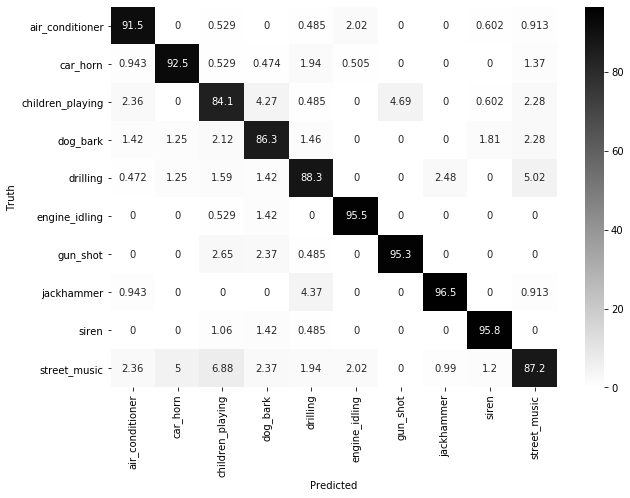

In [28]:
cm = confusion_matrix(y_test_one_column, fnn_predictions_one_column, normalize='pred')*100

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels, fmt='.3g', cmap="gray_r")
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [29]:
print(metrics.classification_report(y_test_one_column, fnn_predictions_one_column, digits=3))

              precision    recall  f1-score   support

           0      0.915     0.956     0.935       203
           1      0.925     0.860     0.892        86
           2      0.841     0.869     0.855       183
           3      0.863     0.905     0.883       201
           4      0.883     0.883     0.883       206
           5      0.955     0.979     0.967       193
           6      0.953     0.847     0.897        72
           7      0.965     0.938     0.951       208
           8      0.958     0.964     0.961       165
           9      0.872     0.830     0.851       230

    accuracy                          0.908      1747
   macro avg      0.913     0.903     0.907      1747
weighted avg      0.908     0.908     0.908      1747



## Guardar modelos treinados

ver se guardou bem subtraindo a previsão feita aqui pela do modelo loaded

In [30]:
joblib.dump(lr, 'lr20.pkl')

['lr20.pkl']

In [31]:
loadedlr=joblib.load('lr20.pkl')

loadedlrpredictions=loadedlr.predict(x_test)

print('Are the 2 predicted arrays the same?:', np.array_equal(loadedlrpredictions, lr_predictions))

Are the 2 predicted arrays the same?: True


In [32]:
joblib.dump(svm, 'svm20.pkl')

['svm20.pkl']

In [33]:
loadedsvm=joblib.load('svm20.pkl')

loadedsvmpredictions=loadedsvm.predict(x_test)

print('Are the 2 predicted arrays the same?:', np.array_equal(loadedsvmpredictions, svm_predictions))

Are the 2 predicted arrays the same?: True


In [34]:
joblib.dump(rf, 'rf20.pkl')

['rf20.pkl']

In [35]:
loadedrf=joblib.load('rf20.pkl')

loadedrfpredictions=loadedrf.predict(x_test)

print('Are the 2 predicted arrays the same?:', np.array_equal(loadedrfpredictions, rf_predictions))

Are the 2 predicted arrays the same?: True


In [36]:
joblib.dump(knn, 'knn20.pkl')

['knn20.pkl']

In [37]:
loadedknn=joblib.load('knn20.pkl')

loadedknnpredictions=loadedknn.predict(x_test)

print('Are the 2 predicted arrays the same?:', np.array_equal(loadedknnpredictions, knn_predictions))

Are the 2 predicted arrays the same?: True


In [38]:
joblib.dump(fnn, 'fnn20.pkl')

['fnn20.pkl']

In [39]:
loadedfnn=joblib.load('fnn20.pkl')

loadedfnnpredictions=loadedfnn.predict(x_test)

print('Are the 2 predicted arrays the same?:', np.array_equal(loadedfnnpredictions, fnn_predictions))

Are the 2 predicted arrays the same?: True
